# Experimentos con el Operador Neural de Fourier para la ecuación de Navier-Stokes

$$
\begin{align*}
\partial_t w(x,t) + u(x,t) \cdot \nabla w(x,t) &= \nu \Delta w(x,t) + f(x)\\
\nabla \cdot u(x,t) &= 0\\
\end{align*}
$$

Para todos los experimentos, se utilizará la siguiente metodología:

1. Se entrenará al modelo con la variante en cuestión.
2. Se evaluará el modelo con el conjunto de validación.
3. Se graficará el resultado del entrenamiento y la predicción.
4. Se medirá el tiempo de entrenamiento y predicción.
5. Se harán inferencias para datos con diferente función de forzamiento $f$ y se compararán los resultados.
6. Se harán inferencias para datos con diferente valor de viscosidad $\nu$ y se compararán los resultados.

## Contenido

1. [Cambiando número de modos de Fourier](#modos)
2. [Cambiar `width` del operador](#width)
3. [Cambiar número de capas](#capas)
4. [Cambiar resolución de los datos de entrenamiento](#resolución)
5. [Cambiar el número de datos de entrenamiento](#datos)

## Preparación del entorno


In [1]:
# !git clone https://github.com/abelsr/Fourier-Neural-Operator.git
%cd Fourier-Neural-Operator
# !mkdir models

/kaggle/working/Fourier-Neural-Operator


## Descargar datos

Los datos a utilizar para las pruebas serán los siguientes:

| Archivo | $\nu$ | $N$ | $T$ | $f(x,y)$ | Resolución |
|---------|-------|-----|-----|-----------|------------|
| `NavierStokes_V1e-5_N1200_T20.mat` | $1e-5$ | 1200 | 20 | $0.1[\sin(2\pi\{x+y\}) + \cos(2\pi\{x+y\})]$ | $64\times64$ |
| `ns_512x512.npy` | $1e-5$ | 100 | 20 | $0.1[\sin(2\pi\{x+y\}) + \cos(2\pi\{x+y\})]$ | $512\times512$ |
| `ns_data_256_1000_v1e-5.npy` | $1e-5$ | 1000 | 20 | $0.1[\sin(2\pi\{x+y\}) + \cos(2\pi\{x+y\})]$ | $256\times256$ |
| `ns_function_cos(xy)_v1e-3.npy` | $1e-3$ | 10 | 20 | $0.1\cos(2\pi\{x+y\})$ | $256\times256$ |
| `ns_data_256_100_v1e-1.npy` | $1e-1$ | 100 | 20 | $0.1[\sin(2\pi\{x+y\}) + \cos(2\pi\{x+y\})]$ | $256\times256$ |
| `ns_data_256_100_v1e-2.npy` | $1e-2$ | 100 | 20 | $0.1[\sin(2\pi\{x+y\}) + \cos(2\pi\{x+y\})]$ | $256\times256$ |
| `ns_data_256_100_v1e-3.npy` | $1e-3$ | 100 | 20 | $0.1[\sin(2\pi\{x+y\}) + \cos(2\pi\{x+y\})]$ | $256\times256$ |
| `ns_data_256_100_v1e-4.npy` | $1e-4$ | 100 | 20 | $0.1[\sin(2\pi\{x+y\}) + \cos(2\pi\{x+y\})]$ | $256\times256$ |


In [ ]:
# NavierStokes_V1e-5_N1200_T20.mat
!wget -O "../data/NavierStokes_V1e-5_N1200_T20.mat" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/EZR6B-qfsbxCve8GTAIGE28B2yNJF4Sg5otQuc1ebKtoyA?e=7CcOOA&download=1">$null

# ns_512x512.npy
!wget -O "../data/ns_512x512.npy" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/EUz-7bZdVwBBpRVnl2IsoCQBQ9k0p20EMl01Qlofi8eNOQ?e=6bRTjx&download=1">$null

# # ns_data_256_1000_v1e-5.npy
!wget -O "../data/ns_data_256_1000_v1e-5.npy" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/EWjjg-163QJDkWoUiGSHLb4BBhJ9zE7YMipCHgEFV-KpDQ?e=qG62dU&download=1">$null

# # ns_function_cos(xy)_v1e-3.npy
!wget -O "../data/ns_function_cos(xy)_v1e-3.npy" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/ERHfbIrSQ7hLpRWcHCQvBSQBTw8y9ZoksOg6Nf_s-QzcXw?e=QENXLh&download=1">$null

# # ns_data_256_100_v1e-1.npy
!wget -O "../data/ns_data_256_100_v1e-1.npy" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/EV7gzsnf6D5Cnk4blGF_YxMB21DF5sqChEEqV5q4huSzzA?e=g9mpcI&download=1">$null

# # ns_data_256_100_v1e-2.npy
!wget -O "../data/ns_data_256_100_v1e-2.npy" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/EaaisJ5qi4JPko_MhYvN1tcBtf3rc2HmKmCEaDxRb6JBOA?e=CADaF1&download=1">$null

# # ns_data_256_100_v1e-3.npy
!wget -O "../data/ns_data_256_100_v1e-3.npy" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/EWZDriFealRNnCWB56sK59gBNARo7-YML70df-uODIKIzQ?e=JT7lIB&download=1">$null

# # ns_data_256_100_v1e-4.npy
!wget -O ".,/data/ns_data_256_100_v1e-4.npy" "https://uaq088-my.sharepoint.com/:u:/g/personal/asantillan20_lms_uaq_mx/EYwqZEWr6HJIq7rUrmtId1wBZJSITJnzz37_3ufs7zyTyQ?e=9LRZiP&download=1">$null

## Librerías

Utilizaremos el repositorio [Fourier-Neural-Operator](https://github.com/abelsr/Fourier-Neural-Operator.git) para realizar los experimentos.

In [ ]:
# Requirements for GPU
!pip install -r requirements_gpu.txt

# Requirements for CPU
#!pip install -r requirements_cpu.txt

In [2]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from FNO.fno_2d_time import FNO2DTime
from FNO import lploss, train
from utilities.utils import MatlabFileReader
import pandas as pd

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    print(f"Utilizando GPU: {torch.cuda.get_device_name(0)}")
else:
    print("Utilizando CPU")

Utilizando GPU: Tesla T4


In [4]:
# Definir la semilla para la reproducibilidad
seed = 42
torch.manual_seed(seed)

## Cargamos los datos

In [21]:
# Cargamos los datos
reader = MatlabFileReader('data/NavierStokes_V1e-5_N1200_T20.mat', to_cuda=True, to_tensor=True)
data = reader.read_file('u')

In [ ]:
data_v1e_4 = np.load('data/ns_data_256_100_v1e-4.npy', mmap_mode='r')
data_v1e_4 = data_v1e_4[:, ::4, ::4, :]
data_v1e_3 = np.load('data/ns_data_256_100_v1e-3.npy', mmap_mode='r')
data_v1e_3 = data_v1e_3[:, ::4, ::4, :]
data_v1e_2 = np.load('data/ns_data_256_100_v1e-2.npy', mmap_mode='r')
data_v1e_2 = data_v1e_2[:, ::4, ::4, :]
data_v1e_1 = np.load('data/ns_data_256_100_v1e-1.npy', mmap_mode='r')
data_v1e_1 = data_v1e_1[:, ::4, ::4, :]

In [22]:
# Creamos los dataloaders
train_data = data[:900, :, :, :]
test_data = data[900:1100, :, :, :]
eval_data = data[1100:, :, :, :]

train_loader = DataLoader(TensorDataset(train_data[:, :, :, :10], train_data[:, :, :, 10:]), batch_size=50, shuffle=True)
test_data_loader = DataLoader(TensorDataset(test_data[:, :, :, :10], test_data[:, :, :, 10:]), batch_size=50, shuffle=True)
eval_data_loader = DataLoader(TensorDataset(eval_data[:, :, :, :10], eval_data[:, :, :, 10:]), batch_size=50, shuffle=True)

## 1. Cambiando número de modos de Fourier<a id="modos"></a>

In [7]:
# Definimos el modelo
model_2_modos = FNO2DTime((2, 2, 2)).to(device)
model_4_modos = FNO2DTime((4, 4, 4)).to(device)
model_8_modos = FNO2DTime((8, 8, 6)).to(device)
model_16_modos = FNO2DTime((16, 16, 6)).to(device)
model_32_modos = FNO2DTime((32, 32, 6)).to(device)

In [9]:
# Entrenamos los modelos
result_2_modos = train.train_model(model_2_modos, train_loader, test_data_loader, device=device, epochs=500, timer=True)
result_4_modos = train.train_model(model_4_modos, train_loader, test_data_loader, device=device, epochs=500, timer=True)
result_8_modos = train.train_model(model_8_modos, train_loader, test_data_loader, device=device, epochs=500, timer=True)
result_16_modos = train.train_model(model_16_modos, train_loader, test_data_loader, device=device, epochs=500, timer=True)
result_32_modos = train.train_model(model_32_modos, train_loader, test_data_loader, device=device, epochs=500, timer=True)

100%|██████████| 500/500 [1:19:42<00:00,  9.56s/it]


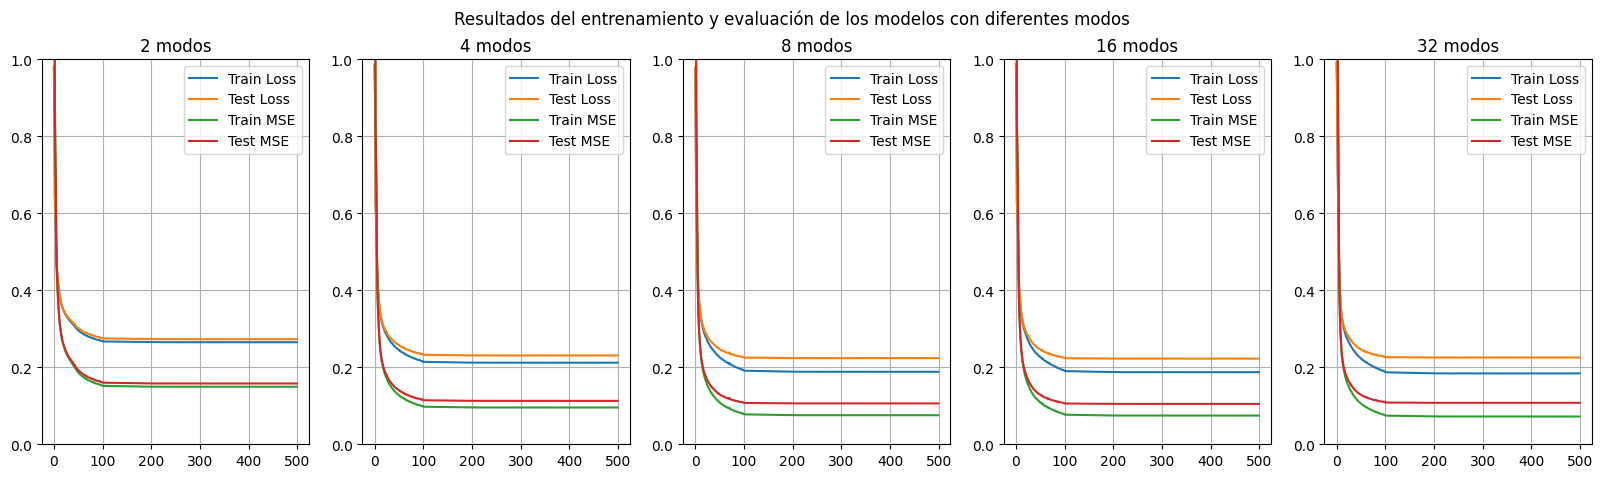

In [11]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, resultados in enumerate([result_2_modos, result_4_modos, result_8_modos, result_16_modos, result_32_modos]):
    ax[i].plot(resultados['results'][0]['train'], label='Train Loss')
    ax[i].plot(resultados['results'][0]['test'], label='Test Loss')
    ax[i].plot(resultados['results'][1]['train'], label='Train MSE')
    ax[i].plot(resultados['results'][1]['test'], label='Test MSE')
    ax[i].set_title(f'{2**(i+1)} modos')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_ylim([0, 1])  # Establecer límites en el eje y
plt.suptitle('Resultados del entrenamiento y evaluación de los modelos con diferentes modos')
plt.show()

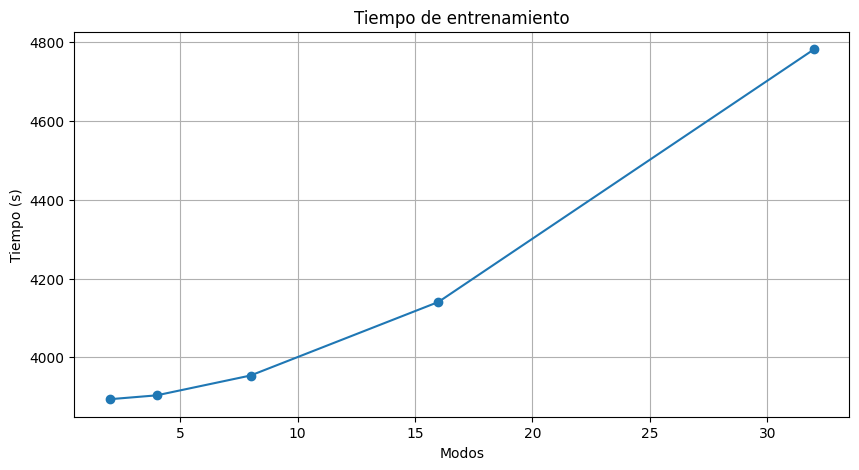

In [30]:
# Graficamos el tiempo de entrenamiento
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot([2, 4, 8, 16, 32], [result_2_modos['time'], result_4_modos['time'], result_8_modos['time'], result_16_modos['time'], result_32_modos['time']], '-o')
ax.set_title('Tiempo de entrenamiento')
ax.set_xlabel('Modos')
ax.set_ylabel('Tiempo (s)')
ax.grid()
plt.show()

In [31]:
pd.DataFrame({"modos": [2, 4, 8, 16, 32], "training_time": [result_2_modos['time'], result_4_modos['time'], result_8_modos['time'], result_16_modos['time'], result_32_modos['time']]})

,modos,training_time
0,2,3893.603686
1,4,3903.435310
2,8,3953.818051
3,16,4140.600446
4,32,4782.422347


In [32]:
# Hacer predicciones con cada modelo y medir el tiempo, hacer 20 veces el experimento
tiempos = {'2 modos': [], '4 modos': [], '8 modos': [], '16 modos': [], '32 modos': []}

with torch.no_grad():
    for x, y in eval_data_loader:
        x = x.to(device)
        y = y.to(device)
        break
    for _ in range(20):
        start = torch.cuda.Event(enable_timing=True)
        end = torch.cuda.Event(enable_timing=True)
        start.record()
        y_2_modos = model_2_modos(x)
        end.record()
        torch.cuda.synchronize()
        time_2_modos = start.elapsed_time(end)
        tiempos['2 modos'].append(time_2_modos)
        start.record()
        y_4_modos = model_4_modos(x)
        end.record()
        torch.cuda.synchronize()
        time_4_modos = start.elapsed_time(end)
        tiempos['4 modos'].append(time_4_modos)
        start.record()
        y_8_modos = model_8_modos(x)
        end.record()
        torch.cuda.synchronize()
        time_8_modos = start.elapsed_time(end)
        tiempos['8 modos'].append(time_8_modos)
        start.record()
        y_16_modos = model_16_modos(x)
        end.record()
        torch.cuda.synchronize()
        time_16_modos = start.elapsed_time(end)
        tiempos['16 modos'].append(time_16_modos)
        start.record()
        y_32_modos = model_32_modos(x)
        end.record()
        torch.cuda.synchronize()
        time_32_modos = start.elapsed_time(end)
        tiempos['32 modos'].append(time_32_modos)

In [37]:
device

device(type='cuda')

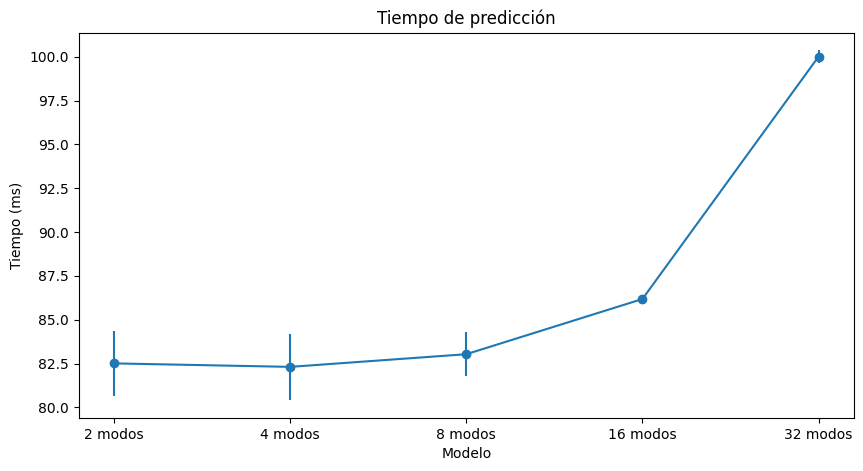

In [38]:
# Graficamos el tiempo de predicción con sus respectivos intervalos de confianza
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
keys, means, stds = [], [], []
for key, value in tiempos.items():
    keys.append(key)
    means.append(np.mean(value))
    stds.append(np.std(value))
ax.errorbar(keys, means, yerr=stds, fmt='o-')
ax.set_title('Tiempo de predicción')
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo (ms)')
plt.show()

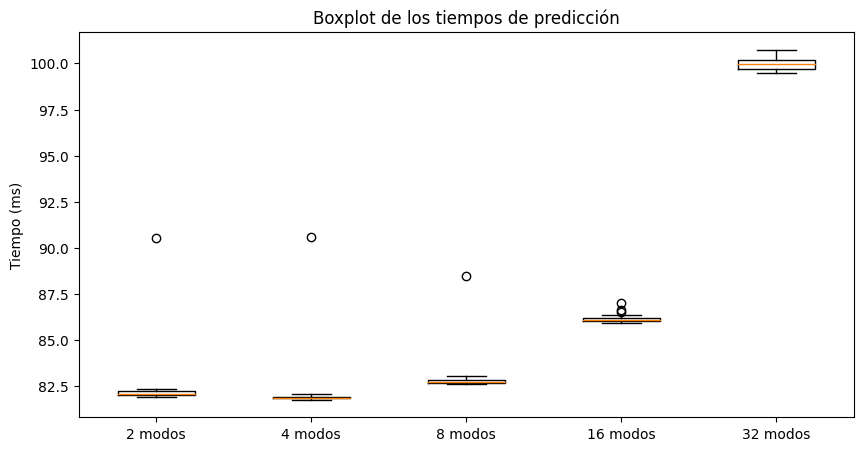

In [39]:
# Boxplot de los tiempos de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.boxplot(tiempos.values())
ax.set_xticklabels(tiempos.keys())
ax.set_title('Boxplot de los tiempos de predicción')
ax.set_ylabel('Tiempo (ms)')
plt.show()

In [40]:
pd.DataFrame({"modos": keys, "time_execution_mean": means, "std": stds})

,modos,time_execution_mean,std
0,2 modos,82.506603,1.838178
1,4 modos,82.308151,1.902387
2,8 modos,83.030325,1.246201
3,16 modos,86.178096,0.257497
4,32 modos,100.004767,0.365379


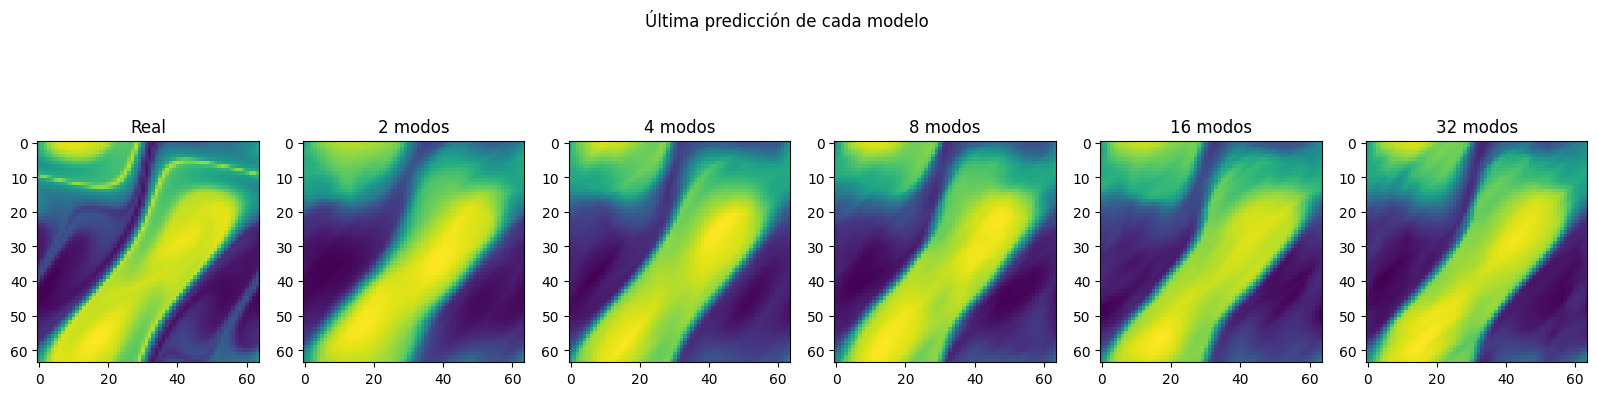

In [42]:
# Graficamos las última predicción de cada modelo
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].imshow(y[0, :, :, -1].cpu().numpy())
ax[0].set_title('Real')
ax[1].imshow(y_2_modos[0, :, :, -1].cpu().numpy())
ax[1].set_title('2 modos')
ax[2].imshow(y_4_modos[0, :, :, -1].cpu().numpy())
ax[2].set_title('4 modos')
ax[3].imshow(y_8_modos[0, :, :, -1].cpu().numpy())
ax[3].set_title('8 modos')
ax[4].imshow(y_16_modos[0, :, :, -1].cpu().numpy())
ax[4].set_title('16 modos')
ax[5].imshow(y_32_modos[0, :, :, -1].cpu().numpy())
ax[5].set_title('32 modos')
plt.suptitle('Última predicción de cada modelo')
plt.show()

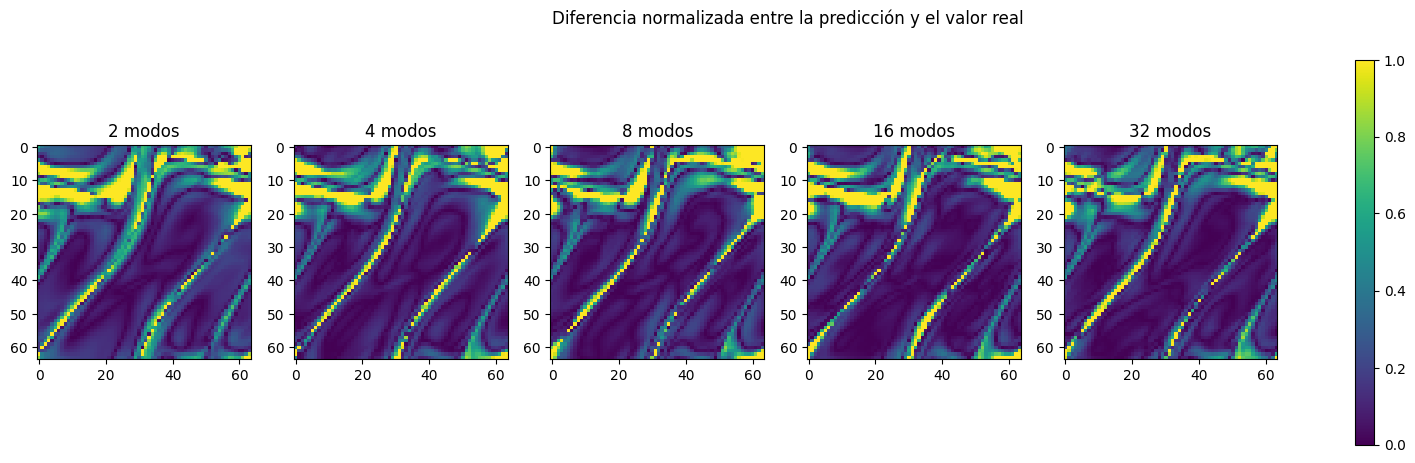

In [43]:
# Graficamos la diferencia normalizada entre la predicción y el valor real
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_2_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[0].set_title('2 modos')
ax[1].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_4_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[1].set_title('4 modos')
ax[2].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_8_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[2].set_title('8 modos')
ax[3].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_16_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[3].set_title('16 modos')
ax[4].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_32_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[4].set_title('32 modos')
# Añadimos la barra de color
cbar = plt.colorbar(ax[4].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_32_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1), ax=ax, orientation='vertical')
plt.suptitle('Diferencia normalizada entre la predicción y el valor real')
plt.show()

In [50]:
!zip models.zip ./models/*.pt

  adding: models/model_16_modos_64x64.pt (deflated 9%)
  adding: models/model_2_modos_64x64.pt (deflated 82%)
  adding: models/model_32_modos_64x64.pt (deflated 8%)
  adding: models/model_4_modos_64x64.pt (deflated 41%)
  adding: models/model_8_modos_64x64.pt (deflated 15%)


## 2. Cambiar `width` <a id="width"></a>

In [8]:
# Definimos los modelos
model_10_width = FNO2DTime((8, 8, 6), width=10).to(device)
model_20_width = FNO2DTime((8, 8, 6), width=20).to(device)
model_30_width = FNO2DTime((8, 8, 6), width=30).to(device)
model_40_width = FNO2DTime((8, 8, 6), width=40).to(device)

In [9]:
# Entrenamos los modelos
result_10_width = train.train_model(model_10_width, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result_20_width = train.train_model(model_20_width, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result_30_width = train.train_model(model_30_width, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result_40_width = train.train_model(model_40_width, train_loader, test_data_loader, device=device, epochs=300, timer=True)

100%|██████████| 300/300 [2:07:14<00:00, 25.45s/it]  


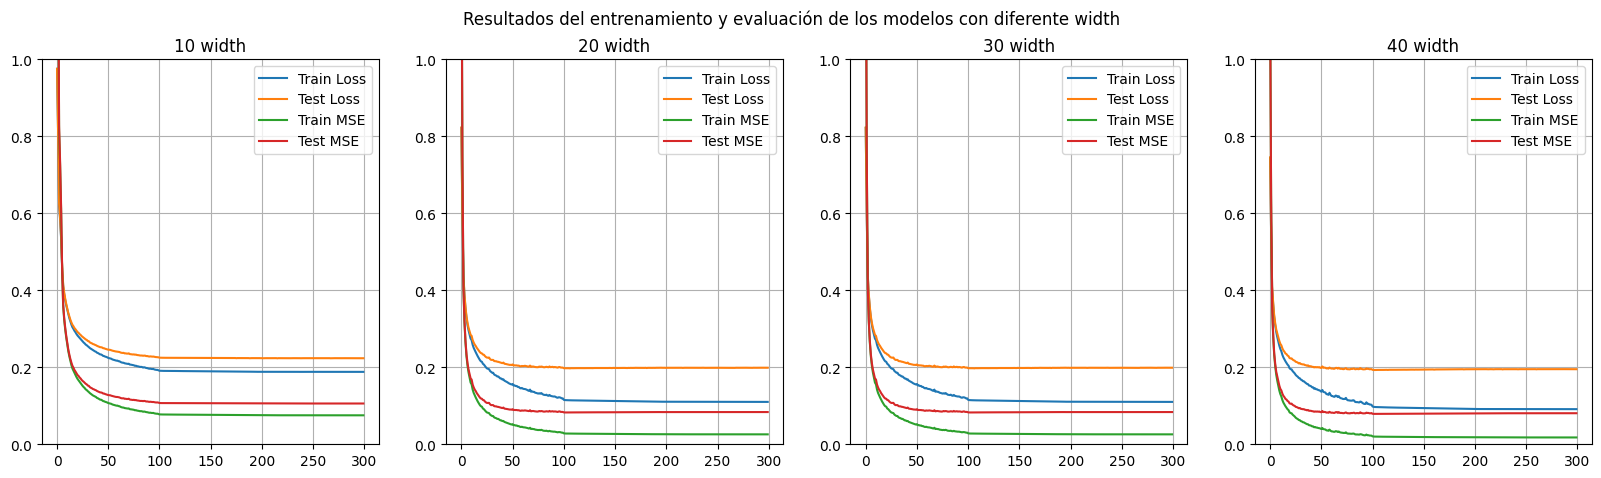

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, resultados in enumerate([result_10_width, result_30_width, result_30_width, result_40_width]):
    ax[i].plot(resultados['results'][0]['train'], label='Train Loss')
    ax[i].plot(resultados['results'][0]['test'], label='Test Loss')
    ax[i].plot(resultados['results'][1]['train'], label='Train MSE')
    ax[i].plot(resultados['results'][1]['test'], label='Test MSE')
    ax[i].set_title(f'{(10 + i*10)} width')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_ylim([0, 1])  # Establecer límites en el eje y
plt.suptitle('Resultados del entrenamiento y evaluación de los modelos con diferente width')
plt.show()

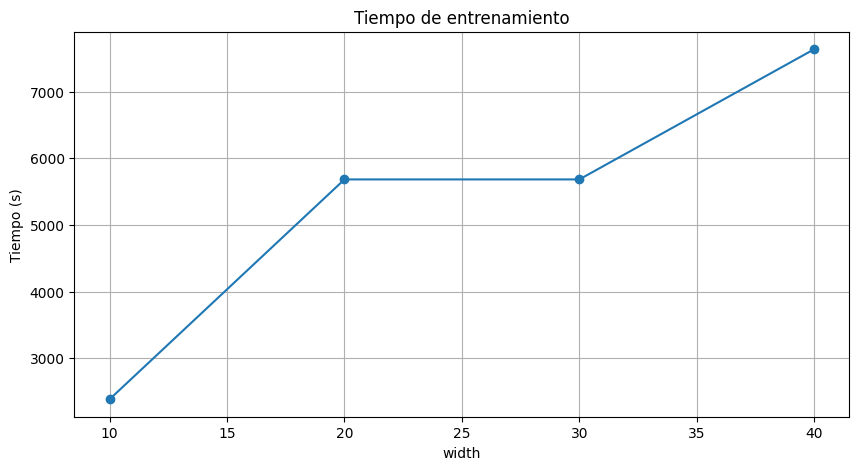

In [15]:
# Graficamos el tiempo de entrenamiento
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot([10, 20, 30, 40], [result_10_width['time'], result_30_width['time'], result_30_width['time'], result_40_width['time']], '-o')
ax.set_title('Tiempo de entrenamiento')
ax.set_xlabel('width')
ax.set_ylabel('Tiempo (s)')
ax.grid()
plt.show()

In [17]:
pd.DataFrame({"width": [10, 20, 30, 40], "training_time": [result_10_width['time'], result_30_width['time'], result_30_width['time'], result_40_width['time']]})

,width,training_time
0,10,2385.543628
1,20,5681.993914
2,30,5681.993914
3,40,7634.660010


In [18]:
# Hacer predicciones con cada modelo y medir el tiempo, hacer 20 veces el experimento
tiempos = {'10 width': [], '20 width': [], '30 width': [], '40 width': []}

with torch.no_grad():
    for x, y in eval_data_loader:
        x = x.to(device)
        y = y.to(device)
        break
    for _ in range(100):
        start = torch.cuda.Event(enable_timing=True)
        end = torch.cuda.Event(enable_timing=True)
        start.record()
        y_2_modos = model_10_width(x)
        end.record()
        torch.cuda.synchronize()
        time_2_modos = start.elapsed_time(end)
        tiempos['10 width'].append(time_2_modos)
        start.record()
        y_4_modos = model_20_width(x)
        end.record()
        torch.cuda.synchronize()
        time_4_modos = start.elapsed_time(end)
        tiempos['20 width'].append(time_4_modos)
        start.record()
        y_8_modos = model_30_width(x)
        end.record()
        torch.cuda.synchronize()
        time_8_modos = start.elapsed_time(end)
        tiempos['30 width'].append(time_8_modos)
        start.record()
        y_16_modos = model_40_width(x)
        end.record()
        torch.cuda.synchronize()
        time_16_modos = start.elapsed_time(end)
        tiempos['40 width'].append(time_16_modos)

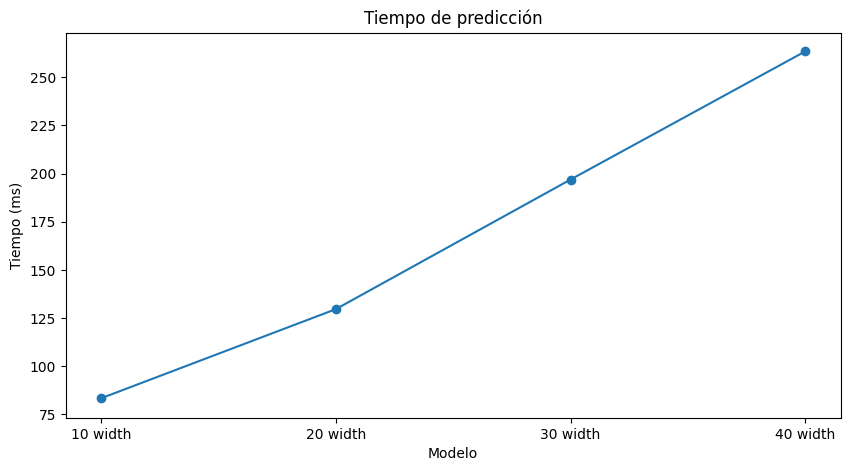

In [19]:
# Graficamos el tiempo de predicción con sus respectivos intervalos de confianza
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
keys, means, stds = [], [], []
for key, value in tiempos.items():
    keys.append(key)
    means.append(np.mean(value))
    stds.append(np.std(value))
ax.errorbar(keys, means, yerr=stds, fmt='o-')
ax.set_title('Tiempo de predicción')
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo (ms)')
plt.show()

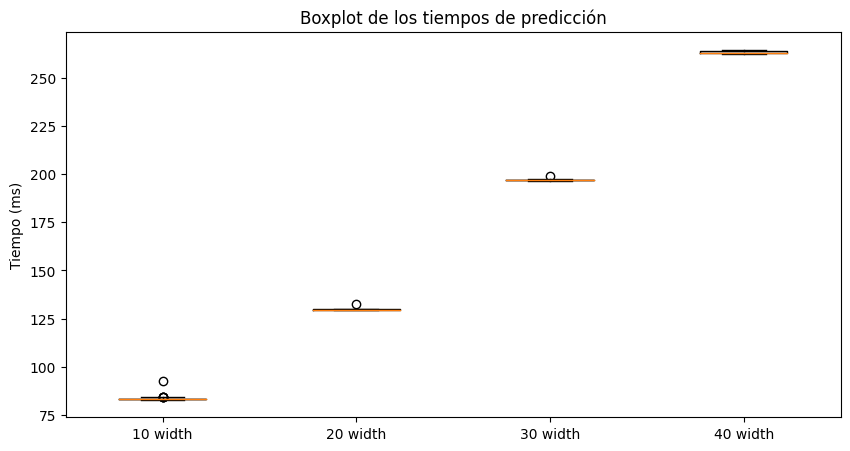

In [20]:
# Boxplot de los tiempos de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.boxplot(tiempos.values())
ax.set_xticklabels(tiempos.keys())
ax.set_title('Boxplot de los tiempos de predicción')
ax.set_ylabel('Tiempo (ms)')
plt.show()

In [21]:
pd.DataFrame({"width": keys, "time_execution_mean": means, "std": stds})

,width,time_execution_mean,std
0,10 width,83.359529,0.964491
1,20 width,129.639467,0.344792
2,30 width,196.933003,0.289818
3,40 width,263.501910,0.540317


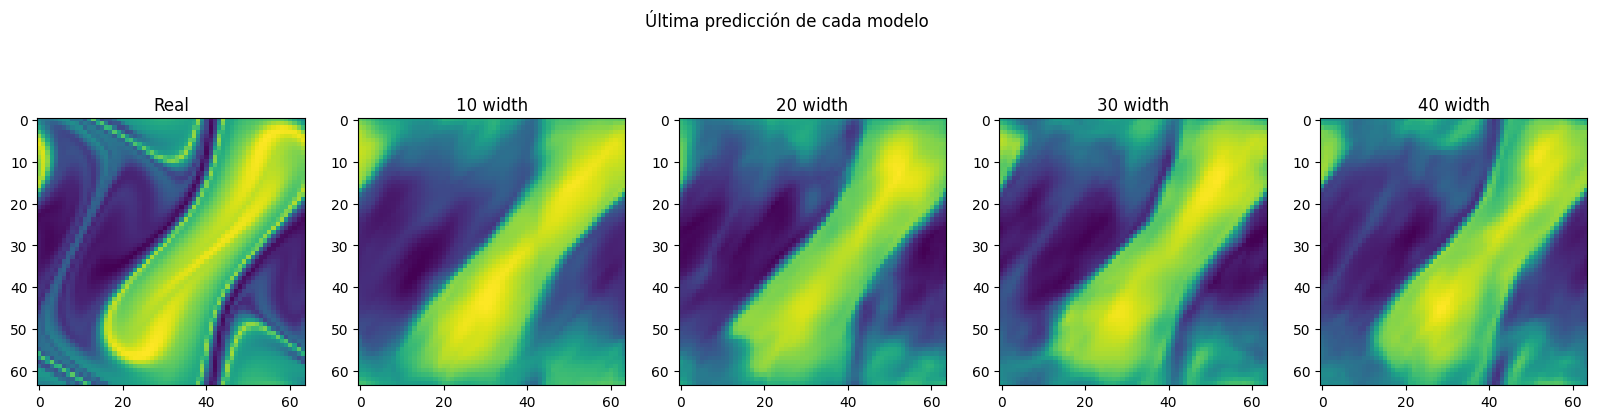

In [22]:
# Graficamos las última predicción de cada modelo
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(y[0, :, :, -1].cpu().numpy())
ax[0].set_title('Real')
ax[1].imshow(y_2_modos[0, :, :, -1].cpu().numpy())
ax[1].set_title('10 width')
ax[2].imshow(y_4_modos[0, :, :, -1].cpu().numpy())
ax[2].set_title('20 width')
ax[3].imshow(y_8_modos[0, :, :, -1].cpu().numpy())
ax[3].set_title('30 width')
ax[4].imshow(y_16_modos[0, :, :, -1].cpu().numpy())
ax[4].set_title('40 width')
plt.suptitle('Última predicción de cada modelo')
plt.show()

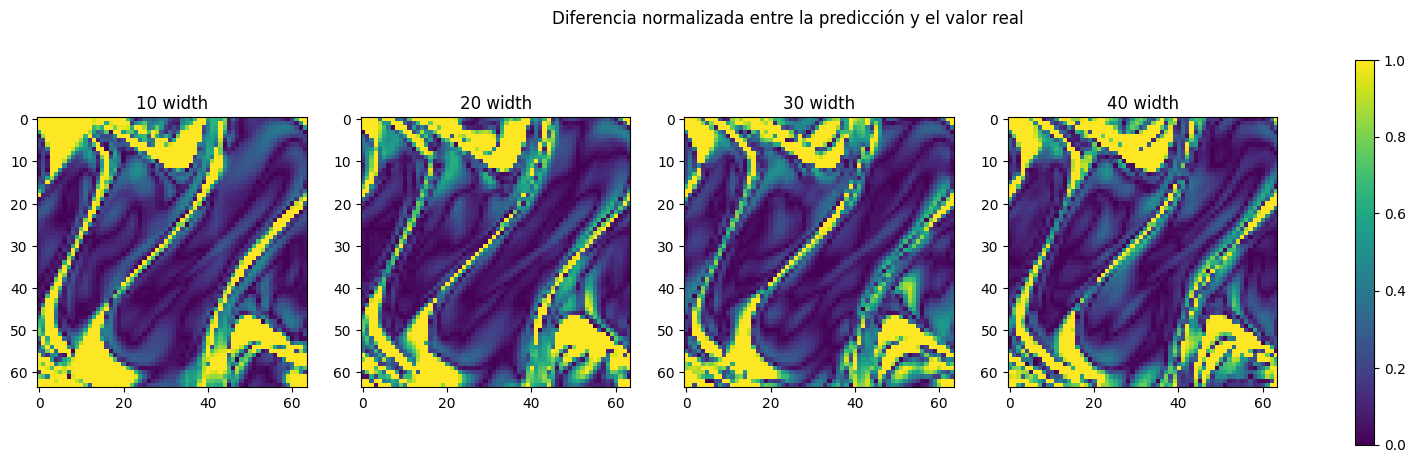

In [24]:
# Graficamos la diferencia normalizada entre la predicción y el valor real
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_2_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[0].set_title('10 width')
ax[1].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_4_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[1].set_title('20 width')
ax[2].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_8_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[2].set_title('30 width')
ax[3].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_16_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[3].set_title('40 width')
# Añadimos la barra de color
cbar = plt.colorbar(ax[3].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_16_modos[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1), ax=ax, orientation='vertical')
plt.suptitle('Diferencia normalizada entre la predicción y el valor real')
plt.show()

In [25]:
torch.save(model_10_width, "./models/model_10_width_64x64.pt")
torch.save(model_20_width, "./models/model_20_width_64x64.pt")
torch.save(model_30_width, "./models/model_30_width_64x64.pt")
torch.save(model_40_width, "./models/model_40_width_64x64.pt")

In [26]:
!zip models.zip ./models/*.pt

updating: models/model_16_modos_64x64.pt (deflated 9%)
updating: models/model_2_modos_64x64.pt (deflated 82%)
updating: models/model_32_modos_64x64.pt (deflated 8%)
updating: models/model_4_modos_64x64.pt (deflated 41%)
updating: models/model_8_modos_64x64.pt (deflated 15%)
  adding: models/model_10_width_64x64.pt (deflated 15%)
  adding: models/model_20_width_64x64.pt (deflated 8%)
  adding: models/model_30_width_64x64.pt (deflated 8%)
  adding: models/model_40_width_64x64.pt (deflated 7%)


## 3. Cambiar número capas de fourier <a id="capas"></a>

In [23]:
# Definimos los modelos
fno_2_layers = FNO2DTime(layers=2).cuda()
fno_4_layers = FNO2DTime(layers=4).cuda()
fno_8_layers = FNO2DTime(layers=8).cuda()
fno_16_layers = FNO2DTime(layers=16).cuda()
fno_32_layers = FNO2DTime(layers=32).cuda()
fno_64_layers = FNO2DTime(layers=64).cuda()

In [56]:
result_2_layers = train.train_model(fno_2_layers, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result = pd.merge(result_2_layers['results'][0], result_2_layers['results'][1], left_index=True, right_index=True)
result['timer'] = result_2_layers['time']
result.to_csv('result_2_layers.csv')
torch.save(fno_2_layers, "./models/fno_2_layers_64x64.pt")
result_4_layers = train.train_model(fno_4_layers, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result = pd.merge(result_4_layers['results'][0], result_4_layers['results'][1], left_index=True, right_index=True)
result['timer'] = result_4_layers['time']
result.to_csv('result_4_layers.csv')
torch.save(fno_4_layers, "./models/fno_4_layers_64x64.pt")
result_8_layers = train.train_model(fno_8_layers, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result = pd.merge(result_8_layers['results'][0], result_8_layers['results'][1], left_index=True, right_index=True)
result['timer'] = result_8_layers['time']
result.to_csv('result_8_layers.csv')
torch.save(fno_8_layers, "./models/fno_8_layers_64x64.pt")
result_16_layers = train.train_model(fno_16_layers, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result = pd.merge(result_16_layers['results'][0], result_16_layers['results'][1], left_index=True, right_index=True)
result['timer'] = result_16_layers['time']
result.to_csv('result_16_layers.csv')
torch.save(fno_16_layers, "./models/fno_16_layers_64x64.pt")
result_32_layers = train.train_model(fno_32_layers, train_loader, test_data_loader, device=device, epochs=300, timer=True)
result = pd.merge(result_32_layers['results'][0], result_32_layers['results'][1], left_index=True, right_index=True)
result['timer'] = result_32_layers['time']
result.to_csv('result_32_layers.csv')
torch.save(fno_32_layers, "./models/fno_32_layers_64x64.pt")
# result_64_layers = train.train_model(fno_64_layers, train_loader, test_data_loader, device=device, epochs=300, timer=True)
# result = pd.merge(result_64_layers['results'][0], result_64_layers['results'][1], left_index=True, right_index=True)
# result['timer'] = result_64_layers['time']
# result.to_csv('result_64_layers.csv')
# torch.save(fno_64_layers, "./models/fno_64_layers_64x64.pt")

 26%|██▋       | 79/300 [1:42:54<4:47:54, 78.16s/it]


KeyboardInterrupt: 

In [81]:
result_32_layers['results'][1]

,train,test
0,2.125704,2.117176
1,2.125418,2.116890
2,2.125395,2.116867
3,2.125393,2.116865
4,2.125392,2.116864
...,...,...
295,2.125392,2.116864
296,2.125392,2.116864
297,2.125392,2.116864
298,2.125392,2.116864


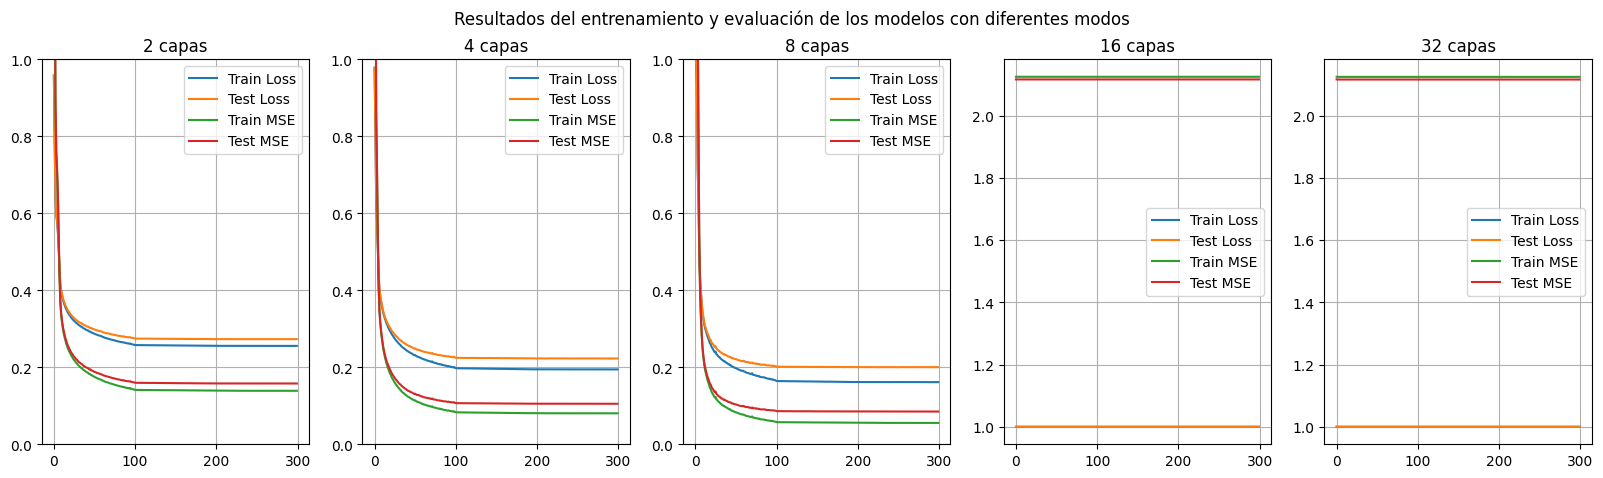

In [91]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, resultados in enumerate([result_2_layers, result_4_layers, result_8_layers, result_16_layers, result_32_layers]):
    ax[i].plot(resultados['results'][0]['train'], label='Train Loss')
    ax[i].plot(resultados['results'][0]['test'], label='Test Loss')
    ax[i].plot(resultados['results'][1]['train'], label='Train MSE')
    ax[i].plot(resultados['results'][1]['test'], label='Test MSE')
    ax[i].set_title(f'{2**(i+1)} capas')
    ax[i].legend()
    ax[i].grid()
    if i < 3:
        ax[i].set_ylim([0, 1])  # Establecer límites en el eje y
plt.suptitle('Resultados del entrenamiento y evaluación de los modelos con diferentes modos')
plt.show()

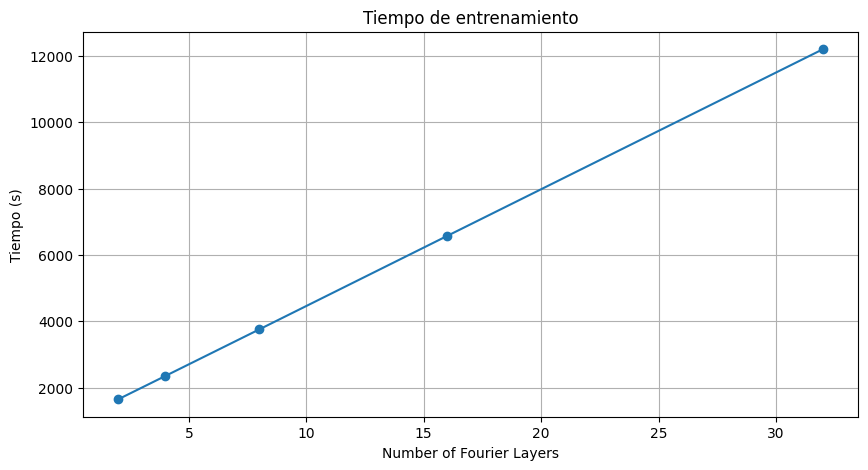

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot([2, 4, 8, 16, 32], [result_2_layers['time'], result_4_layers['time'], result_8_layers['time'], result_16_layers['time'], result_32_layers['time']], '-o')
ax.set_title('Tiempo de entrenamiento')
ax.set_xlabel('Number of Fourier Layers')
ax.set_ylabel('Tiempo (s)')
ax.grid()
plt.show()

In [ ]:
pd.DataFrame({"number of layers": [2, 4, 8, 16, 32, 64], "training_time": [result_2_layers['time'], result_4_layers['time'], result_8_layers['time'], result_16_layers['time'], result_32_layers['time']]})

In [88]:
# Hacer predicciones con cada modelo y medir el tiempo, hacer 100 veces el experimento
tiempos = {'2 layers': [], '4 layers': [], '8 layers': [], '16 layers': [], '32 layers': []}

with torch.no_grad():
    for x, y in eval_data_loader:
        x = x.to(device)
        y = y.to(device)
        break
    for _ in range(100):
        start = torch.cuda.Event(enable_timing=True)
        end = torch.cuda.Event(enable_timing=True)
        start.record()
        y_2_layers = fno_2_layers(x)
        end.record()
        torch.cuda.synchronize()
        time_2_layers = start.elapsed_time(end)
        tiempos['2 layers'].append(time_2_layers)
        start.record()
        y_4_layers = fno_4_layers(x)
        end.record()
        torch.cuda.synchronize()
        time_4_layers = start.elapsed_time(end)
        tiempos['4 layers'].append(time_4_layers)
        start.record()
        y_8_layers = fno_8_layers(x)
        end.record()
        torch.cuda.synchronize()
        time_8_layers = start.elapsed_time(end)
        tiempos['8 layers'].append(time_8_layers)
        start.record()
        y_16_layers = fno_16_layers(x)
        end.record()
        torch.cuda.synchronize()
        time_16_layers = start.elapsed_time(end)
        tiempos['16 layers'].append(time_16_layers)
        start.record()
        y_32_layers = fno_32_layers(x)
        end.record()
        torch.cuda.synchronize()
        time_32_layers = start.elapsed_time(end)
        tiempos['32 layers'].append(time_32_layers)

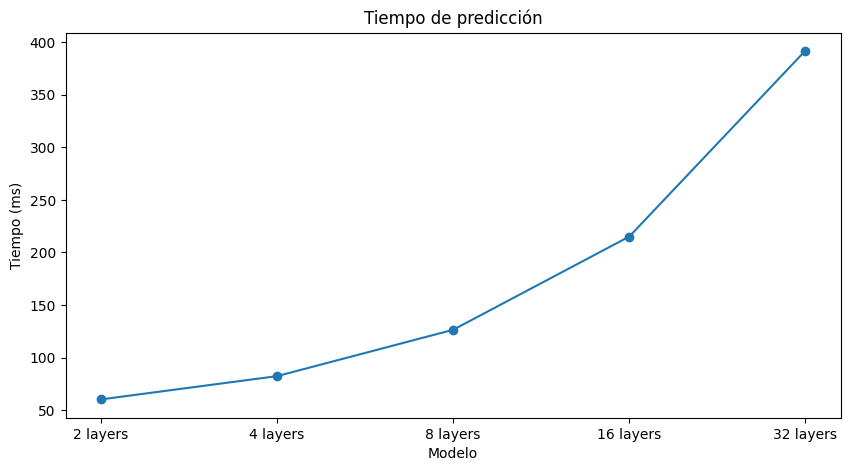

In [92]:
# Graficamos el tiempo de predicción con sus respectivos intervalos de confianza
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
keys, means, stds = [], [], []
for key, value in tiempos.items():
    keys.append(key)
    means.append(np.mean(value))
    stds.append(np.std(value))
ax.errorbar(keys, means, yerr=stds, fmt='o-')
ax.set_title('Tiempo de predicción')
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo (ms)')
plt.show()

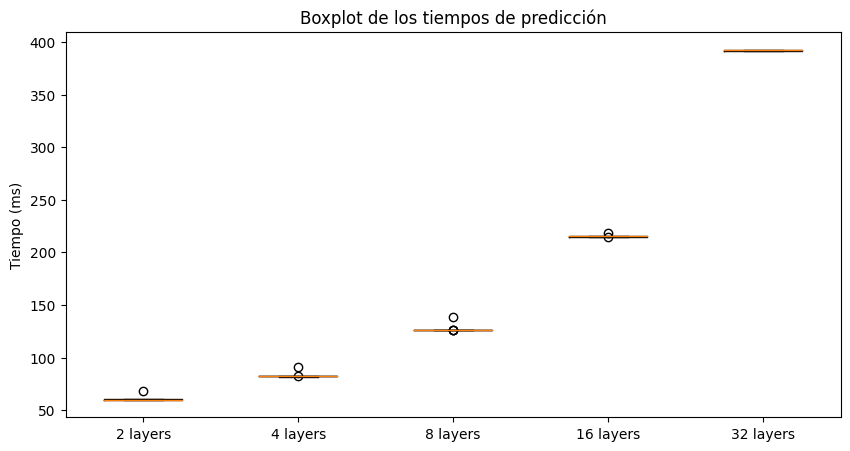

In [93]:
# Boxplot de los tiempos de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.boxplot(tiempos.values())
ax.set_xticklabels(tiempos.keys())
ax.set_title('Boxplot de los tiempos de predicción')
ax.set_ylabel('Tiempo (ms)')
plt.show()

In [ ]:
pd.DataFrame({"number of fourier layers": keys, "time_execution_mean": means, "std": stds})

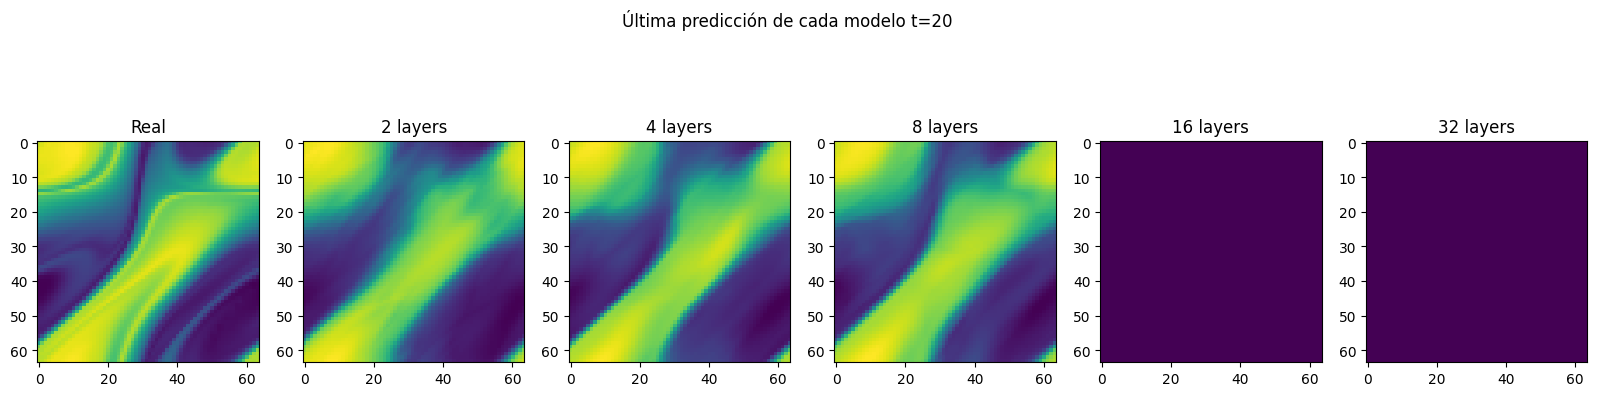

In [94]:
# Graficamos las última predicción de cada modelo
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].imshow(y[0, :, :, -1].cpu().numpy())
ax[0].set_title('Real')
ax[1].imshow(y_2_layers[0, :, :, -1].cpu().numpy())
ax[1].set_title('2 layers')
ax[2].imshow(y_4_layers[0, :, :, -1].cpu().numpy())
ax[2].set_title('4 layers')
ax[3].imshow(y_8_layers[0, :, :, -1].cpu().numpy())
ax[3].set_title('8 layers')
ax[4].imshow(y_16_layers[0, :, :, -1].cpu().numpy())
ax[4].set_title('16 layers')
ax[5].imshow(y_32_layers[0, :, :, -1].cpu().numpy())
ax[5].set_title('32 layers')
plt.suptitle('Última predicción de cada modelo t=20')
plt.show()

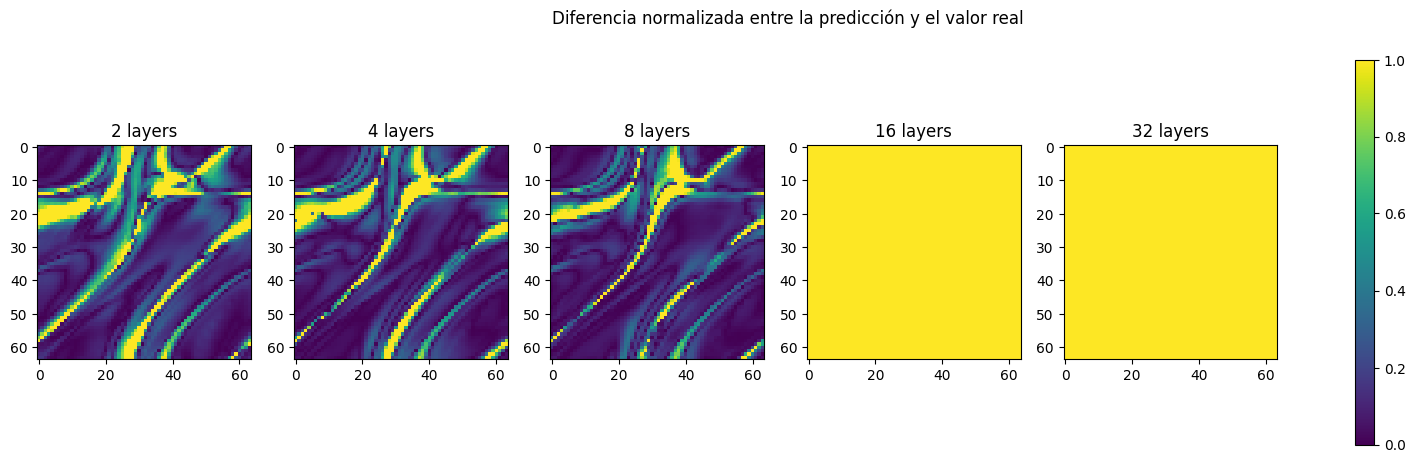

In [96]:
# Graficamos la diferencia normalizada entre la predicción y el valor real
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_2_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[0].set_title('2 layers')
ax[1].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_4_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[1].set_title('4 layers')
ax[2].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_8_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[2].set_title('8 layers')
ax[3].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_16_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[3].set_title('16 layers')
ax[4].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_32_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[4].set_title('32 layers')
# Añadimos la barra de color
cbar = plt.colorbar(ax[4].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_32_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1), ax=ax, orientation='vertical')
plt.suptitle('Diferencia normalizada entre la predicción y el valor real')
plt.show()

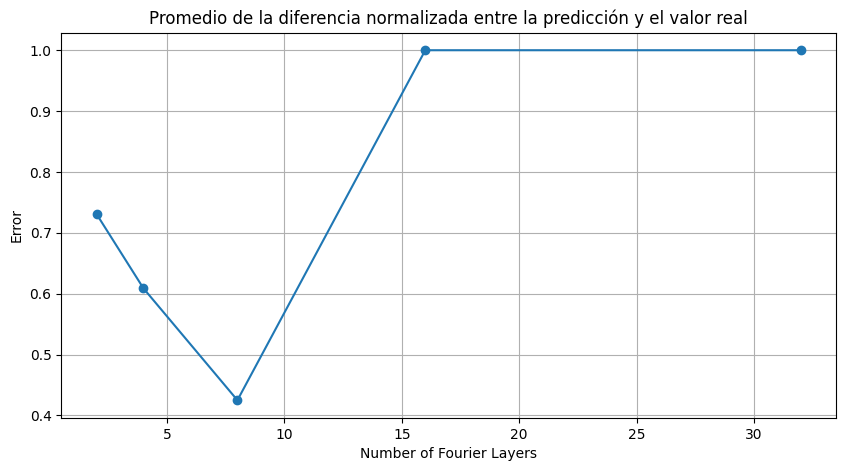

In [98]:
# Graficamos el promedio de la diferencia normalizada entre la predicción y el valor real (t=20)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
error_2_layers = (np.abs(y[0, :, :, -1].cpu().numpy() - y_2_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy())).mean()
error_4_layers = (np.abs(y[0, :, :, -1].cpu().numpy() - y_4_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy())).mean()
error_8_layers = (np.abs(y[0, :, :, -1].cpu().numpy() - y_8_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy())).mean()
error_16_layers = (np.abs(y[0, :, :, -1].cpu().numpy() - y_16_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy())).mean()
error_32_layers = (np.abs(y[0, :, :, -1].cpu().numpy() - y_32_layers[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy())).mean()
ax.plot([2, 4, 8, 16, 32], [error_2_layers, error_4_layers, error_8_layers, error_16_layers, error_32_layers], '-o')
ax.set_title('Promedio de la diferencia normalizada entre la predicción y el valor real')
ax.set_xlabel('Number of Fourier Layers')
ax.set_ylabel('Error')
ax.grid()
plt.show()

In [99]:
# Guardamos los modelos
torch.save(fno_2_layers, "./models/fno_2_layers_64x64.pt")
torch.save(fno_4_layers, "./models/fno_4_layers_64x64.pt")
torch.save(fno_8_layers, "./models/fno_8_layers_64x64.pt")
torch.save(fno_16_layers, "./models/fno_16_layers_64x64.pt")
torch.save(fno_32_layers, "./models/fno_32_layers_64x64.pt")
torch.save(fno_64_layers, "./models/fno_64_layers_64x64.pt")

## 3. Cambiar resolucion de datos de entrenamiento <a id="resolucion"></a>

In [ ]:
# Leemos los datos de 256x256
data_v1e_5 = np.load('data/ns_data_256_1000_v1e-5.npy', mmap_mode='r')

# Creamos los dataloaders
train_data = data_v1e_5[:750, :, :, :]
test_data = data_v1e_5[750:950, :, :, :]
eval_data = data_v1e_5[950:, :, :, :]
train_dataloader = DataLoader(TensorDataset(train_data[:, :, :, :10], train_data[:, :, :, 10:]), batch_size=50, shuffle=True)
test_dataloader = DataLoader(TensorDataset(test_data[:, :, :, :10], test_data[:, :, :, 10:]), batch_size=50, shuffle=True)
eval_dataloader = DataLoader(TensorDataset(eval_data[:, :, :, :10], eval_data[:, :, :, 10:]), batch_size=50, shuffle=True)

In [ ]:
# Definimos el modelo y lo entrenamos
fno_res_256 = FNO2DTime().cuda()
result_256_res = train.train_model(fno_res_256, train_dataloader, test_dataloader, device=device, epochs=300, timer=True)

In [ ]:
# Bajamos la resolución los datos de 256 -> 128
train_data = train_data[:, ::2, ::2, :]
test_data = test_data[:, ::2, ::2, :]
train_dataloader = DataLoader(TensorDataset(train_data[:, :, :, :10], train_data[:, :, :, 10:]), batch_size=50, shuffle=True)
test_dataloader = DataLoader(TensorDataset(test_data[:, :, :, :10], test_data[:, :, :, 10:]), batch_size=50, shuffle=True)

In [ ]:
# Definimos el modelo y lo entrenamos
fno_res_128 = FNO2DTime().cuda()
result_128_res = train.train_model(fno_res_128, train_dataloader, test_dataloader, device=device, epochs=300, timer=True)

In [ ]:
# Bajar la resolución de los datos de 128 -> 64
train_data = train_data[:, ::2, ::2, :]
test_data = test_data[:, ::2, ::2, :]
train_dataloader = DataLoader(TensorDataset(train_data[:, :, :, :10], train_data[:, :, :, 10:]), batch_size=50, shuffle=True)
test_dataloader = DataLoader(TensorDataset(test_data[:, :, :, :10], test_data[:, :, :, 10:]), batch_size=50, shuffle=True)

In [ ]:
# Definimos el modelo y lo entrenamos
fno_res_64 = FNO2DTime().cuda()
result_64_res = train.train_model(fno_res_64, train_dataloader, test_dataloader, device=device, epochs=300, timer=True)

In [ ]:
# Bajar la resolución de los datos de 64 -> 32
train_data = train_data[:, ::2, ::2, :]
test_data = test_data[:, ::2, ::2, :]
train_dataloader = DataLoader(TensorDataset(train_data[:, :, :, :10], train_data[:, :, :, 10:]), batch_size=50, shuffle=True)
test_dataloader = DataLoader(TensorDataset(test_data[:, :, :, :10], test_data[:, :, :, 10:]), batch_size=50, shuffle=True)

In [ ]:
# Definimos el modelo y lo entrenamos
fno_res_32 = FNO2DTime().cuda()
result_32_res = train.train_model(fno_res_32, train_dataloader, test_dataloader, device=device, epochs=300, timer=True)

In [ ]:
# Graficamos los resultados del entrenamiento
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, resultados in enumerate([result_256_res, result_128_res, result_64_res, result_32_res]):
    ax[i].plot(resultados['results'][0]['train'], label='Train Loss')
    ax[i].plot(resultados['results'][0]['test'], label='Test Loss')
    ax[i].plot(resultados['results'][1]['train'], label='Train MSE')
    ax[i].plot(resultados['results'][1]['test'], label='Test MSE')
    ax[i].set_title(f'{256 // (2**i)} res')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_ylim([0, 1])  # Establecer límites en el eje y
plt.suptitle('Resultados del entrenamiento y evaluación de los modelos con diferentes resoluciones')
plt.show()

In [ ]:
# Graficamos el tiempo de entrenamiento
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot([256, 128, 64, 32], [result_256_res['time'], result_128_res['time'], result_64_res['time'], result_32_res['time']], '-o')
ax.set_title('Tiempo de entrenamiento')
ax.set_xlabel('Resolución')
ax.set_ylabel('Tiempo (s)')
ax.grid()
plt.show()

In [ ]:
# Hacer predicciones con cada modelo y medir el tiempo, hacer 100 veces el experimento
tiempos = {'256 res': [], '128 res': [], '64 res': [], '32 res': []}
for x, y in eval_dataloader:
    x = x.to(device)
    y = y.to(device)
    break
for _ in range(100):
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    y_256_res = fno_res_256(x)
    end.record()
    torch.cuda.synchronize()
    time_256_res = start.elapsed_time(end)
    tiempos['256 res'].append(time_256_res)
    start.record()
    y_128_res = fno_res_128(x[:, ::2, ::2, :])
    end.record()
    torch.cuda.synchronize()
    time_128_res = start.elapsed_time(end)
    tiempos['128 res'].append(time_128_res)
    start.record()
    y_64_res = fno_res_64(x[:, ::4, ::4, :])
    end.record()
    torch.cuda.synchronize()
    time_64_res = start.elapsed_time(end)
    tiempos['64 res'].append(time_64_res)
    start.record()
    y_32_res = fno_res_32(x[:, ::8, ::8, :])
    end.record()
    torch.cuda.synchronize()
    time_32_res = start.elapsed_time(end)
    tiempos['32 res'].append(time_32_res)

In [ ]:
# Graficamos el tiempo de predicción con sus respectivos intervalos de confianza
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
keys, means, stds = [], [], []
for key, value in tiempos.items():
    keys.append(key)
    means.append(np.mean(value))
    stds.append(np.std(value))
ax.errorbar(keys, means, yerr=stds, fmt='o-')
ax.set_title('Tiempo de predicción')
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo (ms)')
plt.show()

In [ ]:
# Boxplot de los tiempos de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.boxplot(tiempos.values())
ax.set_xticklabels(tiempos.keys())
ax.set_title('Boxplot de los tiempos de predicción')
ax.set_ylabel('Tiempo (ms)')
plt.show()

In [ ]:
# Graficamos las última predicción de cada modelo
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(y[0, :, :, -1].cpu().numpy())
ax[0].set_title('Real')
ax[1].imshow(y_256_res[0, :, :, -1].cpu().numpy())
ax[1].set_title('256 res')
ax[2].imshow(y_128_res[0, :, :, -1].cpu().numpy())
ax[2].set_title('128 res')
ax[3].imshow(y_64_res[0, :, :, -1].cpu().numpy())
ax[3].set_title('64 res')
ax[4].imshow(y_32_res[0, :, :, -1].cpu().numpy())
ax[4].set_title('32 res')
plt.suptitle('Última predicción de cada modelo')
plt.show()

In [ ]:
# Graficamos la diferencia normalizada entre la predicción y el valor real
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(np.abs(y[0, :, :, -1].cpu().numpy() - y_256_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy()), vmin=0, vmax=1)
ax[0].set_title('256 res')
ax[1].imshow(np.abs(y[0, ::2, ::2, -1].cpu().numpy() - y_128_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, ::2, ::2, -1].cpu().numpy()), vmin=0, vmax=1)
ax[1].set_title('128 res')
ax[2].imshow(np.abs(y[0, ::4, ::4, -1].cpu().numpy() - y_64_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, ::4, ::4, -1].cpu().numpy()), vmin=0, vmax=1)
ax[2].set_title('64 res')
ax[3].imshow(np.abs(y[0, ::8, ::8, -1].cpu().numpy() - y_32_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, ::8, ::8, -1].cpu().numpy()), vmin=0, vmax=1)
ax[3].set_title('32 res')
# Añadimos la barra de color
cbar = plt.colorbar(ax[3].imshow(np.abs(y[0, ::8, ::8, -1].cpu().numpy() - y_32_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, ::8, ::8, -1].cpu().numpy()), vmin=0, vmax=1), ax=ax, orientation='vertical')
plt.suptitle('Diferencia normalizada entre la predicción y el valor real')
plt.show()

In [ ]:
# Graficamos el promedio de la diferencia normalizada entre la predicción y el valor real (t=20)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
error_256_res = (np.abs(y[0, :, :, -1].cpu().numpy() - y_256_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, :, :, -1].cpu().numpy())).mean()
error_128_res = (np.abs(y[0, ::2, ::2, -1].cpu().numpy() - y_128_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, ::2, ::2, -1].cpu().numpy())).mean()
error_64_res = (np.abs(y[0, ::4, ::4, -1].cpu().numpy() - y_64_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, ::4, ::4, -1].cpu().numpy())).mean()
error_32_res = (np.abs(y[0, ::8, ::8, -1].cpu().numpy() - y_32_res[0, :, :, -1, 0].cpu().numpy()) / np.abs(y[0, ::8, ::8, -1].cpu().numpy())).mean()
ax.plot([256, 128, 64, 32], [error_256_res, error_128_res, error_64_res, error_32_res], '-o')
ax.set_title('Promedio de la diferencia normalizada entre la predicción y el valor real')
ax.set_xlabel('Resolución')
ax.set_ylabel('Error')
ax.grid()
plt.show()